In [5]:
# Importing libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr

In [8]:
# Declaring date range for stock returns

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365*5)

end_date, start_date

(datetime.datetime(2025, 12, 28, 16, 39, 36, 173631),
 datetime.datetime(2020, 12, 29, 16, 39, 36, 173631))

In [9]:
# Creating list of tickers
stocks = ['MSFT', 'SPY', 'QQQ']

In [12]:
# Download stock data
data = yf.download(stocks, start=start_date, end=end_date)
data.head()

[*********************100%***********************]  3 of 3 completed

YF.download() has changed argument auto_adjust default to True


Price            Close                                High              \
Ticker            MSFT         QQQ         SPY        MSFT         QQQ   
Date                                                                     
2020-12-29  215.080841  303.705170  346.749115  217.988245  305.384021   
2020-12-30  212.710754  303.714844  347.243866  216.500948  305.189884   
2020-12-31  213.420807  304.462158  349.008179  213.977342  304.947372   
2021-01-04  208.882187  300.163055  344.256714  213.977340  305.966225   
2021-01-05  209.083725  302.637695  346.627777  209.678650  302.909444   

Price                          Low                                Open  \
Ticker             SPY        MSFT         QQQ         SPY        MSFT   
Date                                                                     
2020-12-29  349.120153  214.533911  302.802679  346.161020  217.153451   
2020-12-30  348.280040  212.509259  303.093756  346.851822  216.117123   
2020-12-31  349.736289  210.791663  302.540729  346.534472  212.729937   
2021-01-04  350.473669  206.118708  296.155183  340.550812  213.526355   
2021-01-05  347.719957  206.972740  299.173289  343.565976  208.469620   

Price                                 Volume                       
Ticker             QQQ         SPY      MSFT       QQQ        SPY  
Date                                                               
2020-12-29  304.762933  348.942790  17403200  25871900   53680500  
2020-12-30  304.869655  347.570588  20272300  18138100   49455300  
2020-12-31  303.617890  347.047872  20942100  21611400   78520700  
2021-01-04  305.791525  350.342969  37130100  45305900  110210800  
2021-01-05  299.173289  343.612667  23823000  29323400   66426200

In [14]:
# Selecting Close prices
close_prices = data['Close']
close_prices.head()

Ticker,MSFT,QQQ,SPY
Date,,,
2020-12-29,215.080841,303.705170,346.749115
2020-12-30,212.710754,303.714844,347.243866
2020-12-31,213.420807,304.462158,349.008179
2021-01-04,208.882187,300.163055,344.256714
2021-01-05,209.083725,302.637695,346.627777


In [15]:
# Calaculating daily returns
log_returns = np.log(close_prices / close_prices.shift(1))
log_returns.head()

Ticker,MSFT,QQQ,SPY
Date,,,
2020-12-29,NaN,NaN,NaN
2020-12-30,-0.011081,0.000032,0.001426
2020-12-31,0.003333,0.002458,0.005068
2021-01-04,-0.021495,-0.014221,-0.013708
2021-01-05,0.000964,0.008211,0.006864


In [17]:
# Calculating cumulative returns
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns.head()

Ticker,MSFT,QQQ,SPY
Date,,,
2020-12-29,NaN,NaN,NaN
2020-12-30,-0.011081,0.000032,0.001426
2020-12-31,-0.007748,0.002489,0.006494
2021-01-04,-0.029244,-0.011732,-0.007214
2021-01-05,-0.028279,-0.003521,-0.000350


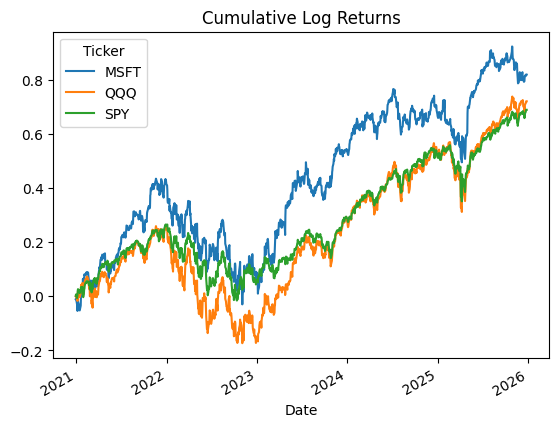

In [18]:
# plotting cumulative returns  
cumulative_log_returns.plot(title='Cumulative Log Returns')
plt.show()